# Evaluate your ML Model via Cross-Validation

Evaluating your model on the same data as it was trained on is bad practice. Instead, you should split your data into train and test data. However, because we only split once, the performance metrics highly depend on those two sets, i.e. the metrics could be different if the data was split otherwise. Furthermore, these train-test splits can become costly when you only have a limited amount of data; you want to use as much data as possible to train your model. That is when k-fold cross-validation comes into play; you split the data k times into a train and test set, called a fold. For every fold you measure the performance and take the average to get a good estimate of the overall performance.  
In this notebook, you will create a `LinearRegression`-model from scikit-learn. Using this model, you will then use the `cross_val_score`-function, also from scikit-learn, to calculate the R² of your linear regression model.

![Image](kfolds.png)  

[Source](http://ethen8181.github.io/machine-learning/model_selection/model_selection.html)  

In [1]:
# Load packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


%config InlineBackend.figure_format = 'retina'

In [2]:
# Load data from the csv file
df = pd.read_csv("CV_data.csv")
df.head()

,X,y
0,7.558604,15.182954
1,6.375443,12.134341
2,6.646930,14.919637
3,4.347092,7.523827
4,1.510377,3.481932


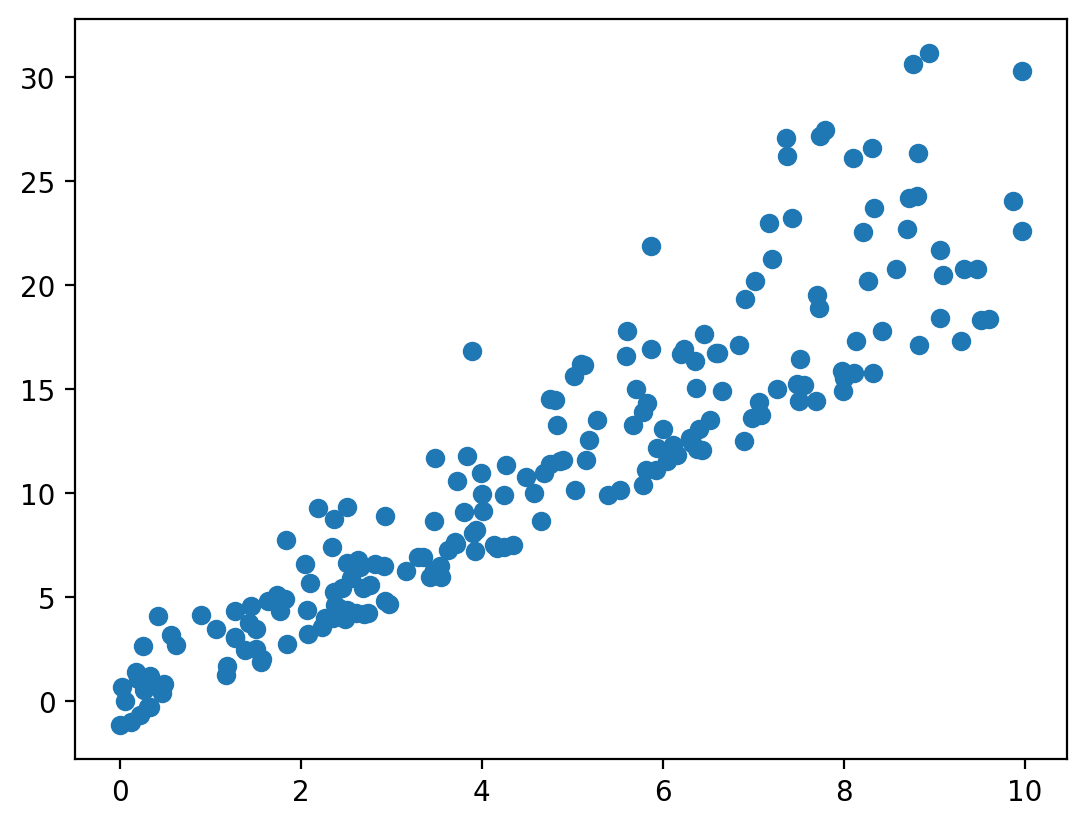

In [3]:
# Visualize data with a scatter plot
plt.scatter(df['X'], df['y'])
plt.show()

In [4]:
NUM_OF_FOLDS = 5

reg = LinearRegression()
scores = cross_val_score(reg, df['X'].values.reshape(-1,1), df['y'],  scoring='r2', error_score="raise", cv=5)

print(scores)
print('The average R² over all the folds is %.2f' % np.mean(scores))

[0.84884854 0.87649661 0.80941179 0.8458479  0.7759934 ]
The average R² over all the folds is 0.83
